<a href="https://colab.research.google.com/github/MariaNatiele/AprendizadoMaquina_Projetos/blob/main/3_Seres_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Seres Temporais
📚 Fontes

[Datetime](https://docs.python.org/3/library/datetime.html)
</br>
[Pandas.plotting](https://pandas.pydata.org/docs/reference/api/pandas.plotting.register_matplotlib_converters.html)

In [1]:
#Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#
from datetime import datetime
#Para Seres Temporais
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#Importando os dados
base = pd.read_csv('AirPassengers.csv', sep=',')
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
#Tipos dos atributos -> objeto precisa ser convertido para formato data
base.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
#Transformando str em date
a = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col= 'Month', date_parser = a)

base

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
#Criando a Sere temporal
st = base['#Passengers']
st

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [7]:
#visulizando registro especifico pelo indice
st[2]

132

In [8]:
#Visualizando pela data
st['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [9]:
#Visualizando intervalo
st['1949-04': '1949-10']

Month
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [10]:
#Visualizarpor ano
st['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [11]:
#Valor maximo
st.index.max()

Timestamp('1960-12-01 00:00:00')

In [12]:
st.index.min()

Timestamp('1949-01-01 00:00:00')

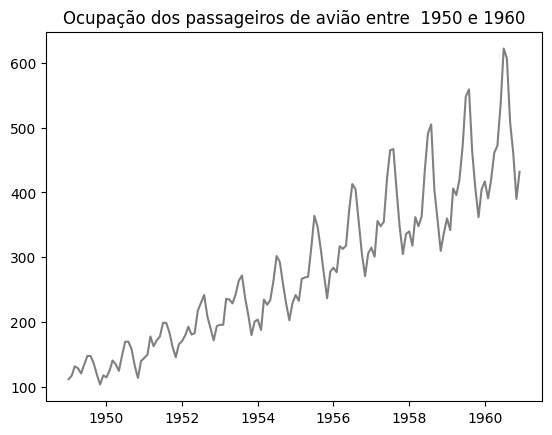

In [13]:
plt.plot(st,color='grey')
plt.title('Ocupação dos passageiros de avião entre  1950 e 1960');

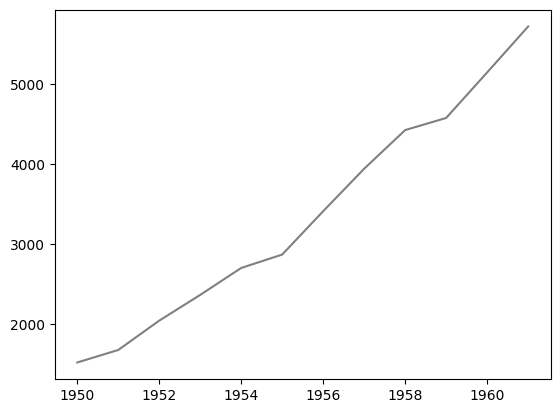

In [37]:
ts_ano = st.resample('A').sum()
plt.plot(ts_ano, color='grey')

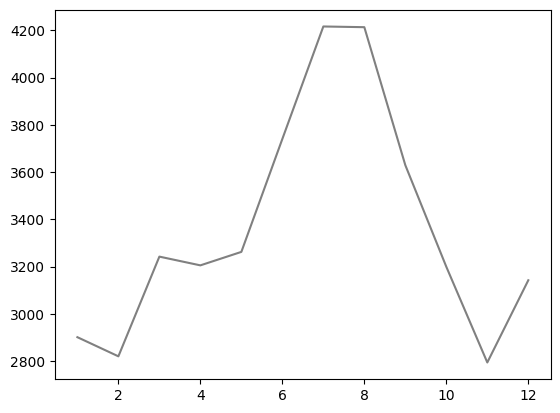

In [21]:
ts_mes =  base.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes, color='grey')

Text(0.5, 1.0, 'Por data ')

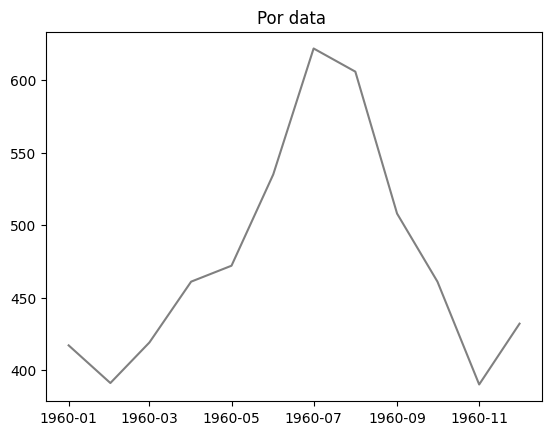

In [23]:
ts_ano2  = st['1960-01-01':'1960-12-01']
plt.plot(ts_ano2, color='grey')
plt.title('Por data ')

##Decomposição
</br>
1 - Fontes
</br>

[Seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)

In [25]:
#Biblioteca
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
#Decomposição

decomposicao = seasonal_decompose(st)

In [29]:
#Tendencia
tendencia = decomposicao.trend
tendencia


Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [30]:
#Sazonalidade
sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [31]:
#Residuos
aleatorio = decomposicao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

Text(0.5, 1.0, 'Sazonal')

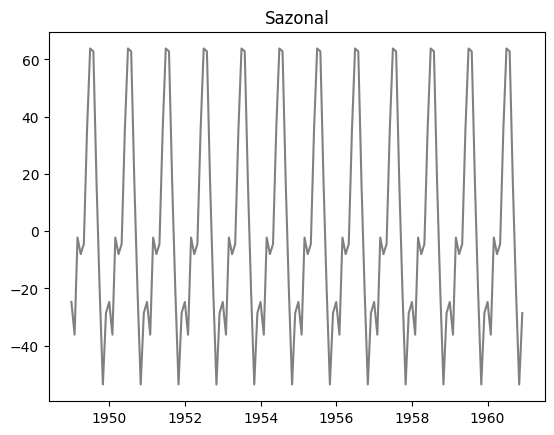

In [34]:
#Mostrando cada elemento da serie temporal
plt.plot(sazonal, color='grey')
plt.title('Sazonal')

Text(0.5, 1.0, 'Tendência')

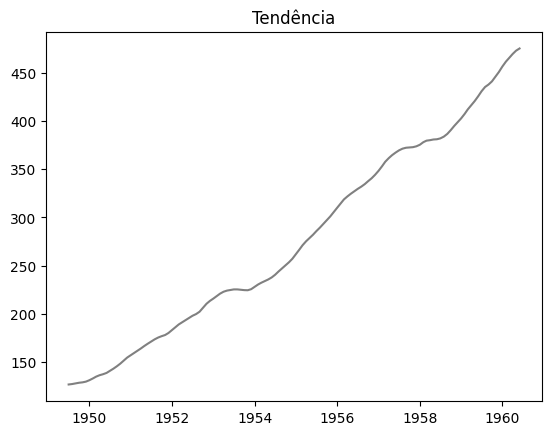

In [35]:
plt.plot(tendencia, color='grey')
plt.title('Tendência')

Text(0.5, 1.0, 'Aleatório')

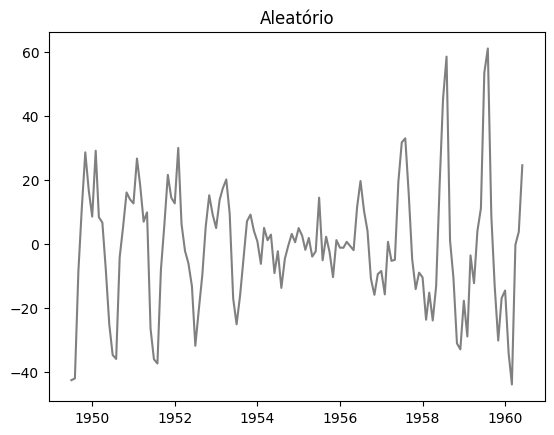

In [36]:
plt.plot(aleatorio, color='grey')
plt.title('Aleatório')

##Arima
[Arima](https://alkaline-ml.com/pmdarima/modules/classes.html#pmdarima-arima-arima-estimator-differencing-tests)

In [41]:
#Instalando o pmdarima
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.7 MB/s eta 0:00:00


In [42]:
#Biblioteca

from pmdarima.arima import auto_arima

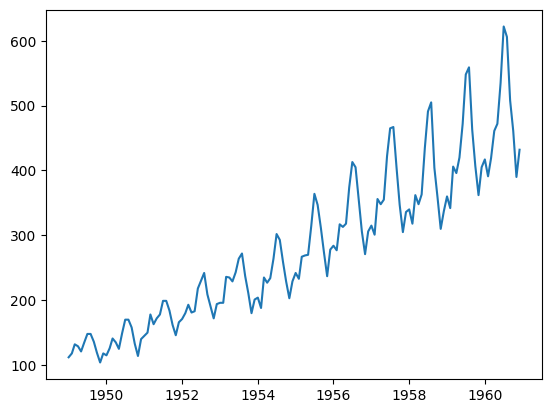

In [43]:
plt.plot(base)